In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [18]:
df=pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Rating,Time,Summary,Review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Rating                  568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Review                  568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [20]:
df=df.drop(columns=['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time'])

In [21]:
df

,Rating,Summary,Review
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...
568449,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


## Remove null and duplicate rows

In [22]:
df = df.dropna(subset=['Review'])
df = df.dropna(subset=['Rating'])
df = df.dropna(subset=['Summary'])

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
conflicting_reviews = df.groupby('Review')['Rating'].nunique()
conflicting_reviews = conflicting_reviews[conflicting_reviews > 1].index
df = df[df['Review'].isin(conflicting_reviews) == False]

In [25]:
conflicting_reviews = df.groupby('Summary')['Rating'].nunique()
conflicting_reviews = conflicting_reviews[conflicting_reviews > 1].index
df = df[df['Summary'].isin(conflicting_reviews) == False]

In [26]:
df.duplicated().any()

np.False_

In [27]:
df["Review"] = df["Summary"] + " " + df["Review"]

In [28]:
df.reset_index(drop=True, inplace=True)
df

,Rating,Summary,Review
0,5,Good Quality Dog Food,Good Quality Dog Food I have bought several of...
1,4,"""Delight"" says it all","""Delight"" says it all This is a confection tha..."
2,2,Cough Medicine,Cough Medicine If you are looking for the secr...
3,4,Nice Taffy,Nice Taffy I got a wild hair for taffy and ord...
4,5,Great! Just as good as the expensive brands!,Great! Just as good as the expensive brands! ...
...,...,...,...
311488,5,"If its all natural, this is like panacea of Sp...","If its all natural, this is like panacea of Sp..."
311489,5,Very large ground spice jars.,Very large ground spice jars. My only complain...
311490,5,Will not do without,Will not do without Great for sesame chicken.....
311491,5,Perfect for our maltipoo,Perfect for our maltipoo These stars are small...


In [29]:
df=df.drop(columns='Summary')

In [30]:
df['Rating'].value_counts()

Rating
5    198591
4     42514
1     29893
3     24260
2     16235
Name: count, dtype: int64

In [31]:
import pandas as pd

# Example: desired counts for each score
desired_counts = {
    5: 50000,
    4: 42514,
    3: 24260,
    2: 16235,
    1: 29893
}

df_final = pd.DataFrame()

for score, count in desired_counts.items():
    df_subset = df[df['Rating'] == score]
    
    

    # If we need more than unique rows available, allow replacement
    if count <= len(df_subset):
        sampled = df_subset.sample(n=count, random_state=42, replace=False)
    
    
    df_final = pd.concat([df_final, sampled])
# Shuffle the final dataset
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)


print(df_final['Rating'].value_counts())



Rating
5    50000
4    42514
1    29893
3    24260
2    16235
Name: count, dtype: int64


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162902 entries, 0 to 162901
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  162902 non-null  int64 
 1   Review  162902 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


## Remove non english reviews

In [33]:
import pandas as pd
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException


def detect_language(text):
    try:
        return detect(str(text))
    except LangDetectException:
        return 'unknown'

# Apply language detection
df_final['language'] = df_final['Review'].apply(detect_language)

In [34]:
# Count non-English reviews
non_english_count = df_final[df_final['language'] != 'en'].shape[0]


language_counts = df_final['language'].value_counts()

print("Non-English reviews:", non_english_count)
print("\nLanguage distribution:\n", language_counts)

Non-English reviews: 89

Language distribution:
 language
en    162813
de        31
es        30
af         9
it         5
nl         4
no         2
pt         2
fr         2
cy         1
et         1
ca         1
sv         1
Name: count, dtype: int64


In [35]:
df_final = df_final[df_final['language'] == 'en'].drop(columns=['language'])

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162813 entries, 0 to 162901
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  162813 non-null  int64 
 1   Review  162813 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


## Viewing dataset review

In [37]:
df_final['word_count'] = df_final['Review'].astype(str).apply(lambda x: len(x.split()))

In [38]:
df_final['Review'] = df_final['Review'].str.lower()
df_final['Review'] = df_final['Review'].str.replace(r'\[.*?\]', '', regex=True)

In [39]:
# Group by Rating and find the minimum word count
min_word_count_per_rating = df_final.groupby('Rating')['word_count'].min()

# Display the result
print(" Minimum word count per Rating:")
print(min_word_count_per_rating)

 Minimum word count per Rating:
Rating
1     9
2    13
3    12
4    11
5    11
Name: word_count, dtype: int64


In [40]:
# Specify the rating you're interested in
target_rating = 5


# Filter for the target rating
rating_df = df_final[df_final['Rating'] == target_rating]

# Get the minimum word count for that rating
min_word_count = rating_df['word_count'].min()

# Get the reviews with that minimum word count
min_reviews = rating_df[rating_df['word_count'] == min_word_count]

# Display
print(f" Minimum word count for Rating {target_rating}: {min_word_count}")
print(" Reviews with minimum word count:")
print(min_reviews[['Review', 'word_count']])


 Minimum word count for Rating 5: 11
 Reviews with minimum word count:
                                                  Review  word_count
10567  twinings tea very good tea and fast service. w...          11


In [41]:
max_word_count_per_rating = df_final.groupby('Rating')['word_count'].max()

# Display the result
print(" Max word count per Rating:")
print(max_word_count_per_rating)

 Max word count per Rating:
Rating
1    2157
2    1241
3    3451
4    2070
5    2526
Name: word_count, dtype: int64


In [42]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 1

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 1:

1. other flavors are good, but not barbeque! i bought 3 different flavors as i'm gluten free and they seemed safe. the pb & j was the best although it's kind of expensive when you are getting mostly peanuts but tasted pretty darned good. the almonds w/cranberries is pretty good too! the barbeque i didn't like at all, they taste strictly like chipotle, you cannot taste any ranch, or barbeque taste.

2. stinky beans when i opened the bag of beans, couldn't believe the smell!  smells like dirty diapers.  thought the beans must be contaminated, but ground and brewed a cup, taste was good, not the greatest brewed coffee aroma, but not disgusting like the beans and grounds.  too cheap to throw out the bag of beans, so will hold my nose and continue using and hope for no health side effects.

3. used as instructed. never came up. used as instructed. never came up. i need to write more words to get the minimum number but i would not buy one again.

4. 

In [43]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 2

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 2:

1. shipping charge let me start by saying that i am a big fan of britt coffees and costa rican coffees.  i don't have an issue with the product or the price for the product.  my beef is with the outrageous shipping charge for a 12 oz. sealed bag of coffee.  that was about $10.  the coffee cost $9.50.  the shipping box was big enough to hold ten bags of coffee.  why not just a sturdy envelope?  i will definitely find costa rican coffee in my local area and buy from a brick & stick store.  usually i try to offset the state sales tax (8.25% in  the dfw area)with the shipping and handling charge.  there seems to be a trend of increasing shipping and handling costs.  local sales tax on this purchase would have been in the range of $0.80.  soon we will all be paying sales tax and shipping charges through on internet sales unless something keeps us from paying another tax which will surely affect the internet market.  anyway, just my 2 cents worth.  n

In [44]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 3

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 3:

1. love the candy, hate the packaging problem 8 of my 12 packages came with holes in them and candy spilled all over.  i love good & plenty but there must be some type of packaging problems.  hopefully i will receive a refund and the problem will be fixed before my next subscribe and save shipment arrives.  other than that problem, the remaining candy is fresh and tastes great.

2. coffee in a can. well, i'm not sure what i can really say about this - it's literally just coffee in a can with a tiny bit of sugar. i do appreciate that there isn't much sugar, i really hate super-sweet canned coffee drinks. but i guess i'm a light-weight when it comes to coffee because i just couldn't drink this from the can, i had to pour it in a glass and add milk to it. the coffee is very strong and very bitter. but i guess if you like drinking cold black coffee with a dash of sugar, then this is the drink for you!

3. a fizzy hydrating drink i was only provided

In [45]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 4

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 4:

1. cookies with a kick! once i get past the concept of "organic cookies", which sounds like an oxymoron, i have to admit: these ginger snaps are not for wussies.  these little gems are really concentrated with ginger flavor; one might even say they're downright spicy.  the little bits of candied ginger are no small part of this potent taste.  they really impress as an old-fashioned style cookie, and remind me a bit of the british "ginger nuts".  as cookies go, they're not bad in the fat department either, with 130 calories per serving, 30 from fat.  if you like your ginger flavor strong, these are the cookies for you.

2. it is ok, not as good as fresh milk though for someone who lives alone like me, finishing drinking a half gallon milk before expiration date is far reach of possibility.<br />well, the taste is not as good as fresh milk, but it's ok.

3. delicious, creamy, and a good value i enjoy a hot cup of instant flavored coffee in the af

In [46]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 5

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 5:

1. munchie heaven they taste sublime without the salt! what else is there to know. it prevents me from eating a fat-filled piece of cake, and the ensuing weight stability is ecstasy!!! also great for the blood pressure. now i'll tell you a little known fact. eat one at a time, slowly, as the repetitive chewing, as in peanuts or gum, actually releases seratonin. look it up!!

2. replacement for tones steak dust made by the same company that makes tones steak dust. same ingredients, same smell and taste. slighly different color. a great deal for us folks looking for the tones product.

3. lots of vanilla beans these beans arrived quickly and were well-packed in a vacuum sealed pouch.  there were lots and lots of long, supple black vanilla beans.  they smelled great and were very pliable.  i immediatley made some vanilla sugar, which 3 weeks into it, smells wonderful.  i intend to add beans to vodka for extract.  i also added several beans to oil 

## Visualization

In [47]:
df_final['Rating'].value_counts()

Rating
5    49964
4    42494
1    29877
3    24247
2    16231
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20308\3539536237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_final, palette='viridis')


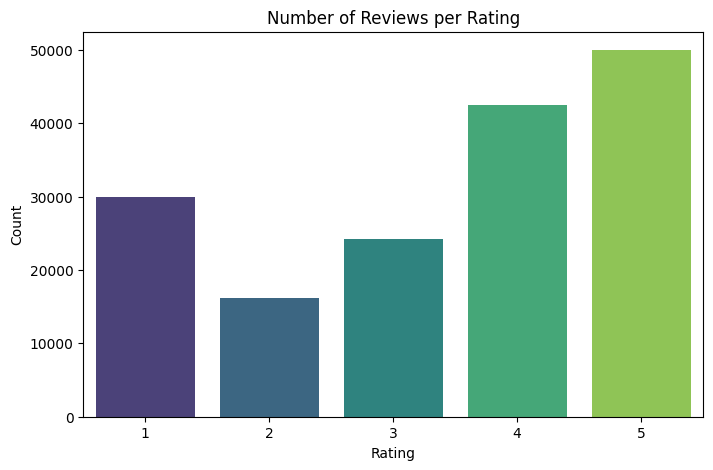

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df_final, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

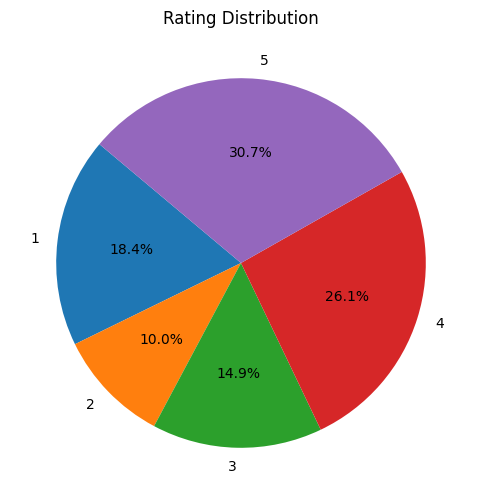

In [49]:
rating_counts = df_final['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20308\157095490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='word_count', data=df_final, palette='Set2')


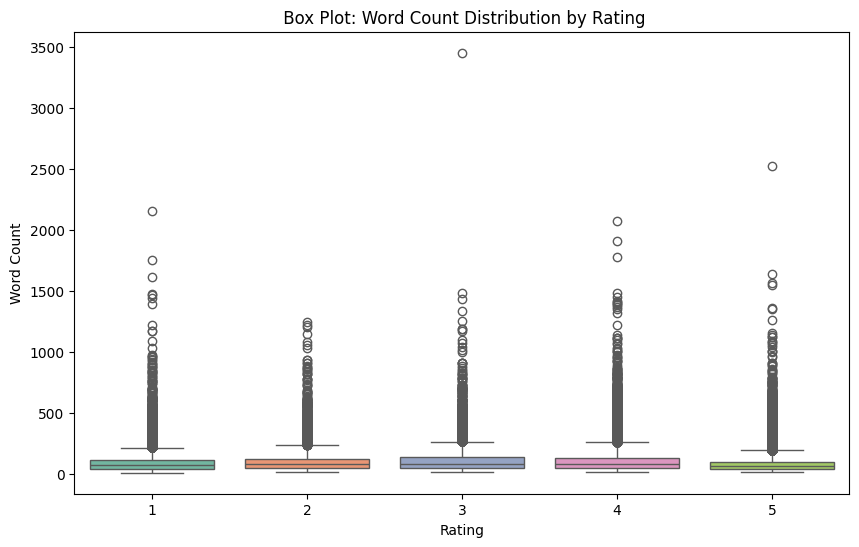

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20308\157095490.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Rating')


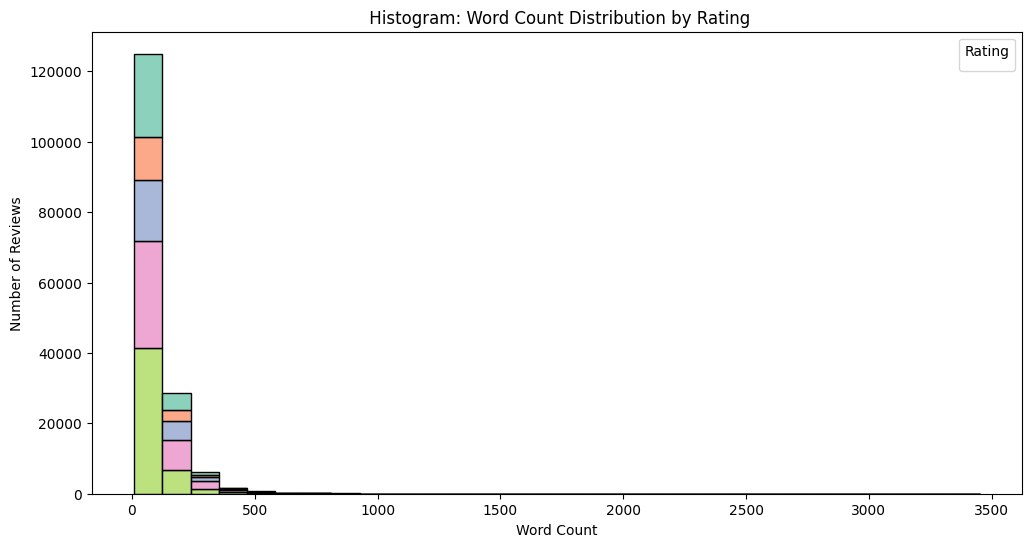

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='word_count', data=df_final, palette='Set2')
plt.title(" Box Plot: Word Count Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Word Count")
plt.show()

# STEP 3: Histogram — Word Count by Rating
plt.figure(figsize=(12, 6))
sns.histplot(data=df_final, x='word_count', hue='Rating', multiple='stack', palette='Set2', bins=30)
plt.title(" Histogram: Word Count Distribution by Rating")
plt.xlabel("Word Count")
plt.ylabel("Number of Reviews")
plt.legend(title='Rating')
plt.show()

In [53]:
word_count_by_rating = df_final.groupby('Rating')['word_count'].sum()

# Step 3: Display the result
print(" Total Word Count per Rating:\n")
print(word_count_by_rating)

 Total Word Count per Rating:

Rating
1    2734075
2    1636363
3    2599861
4    4484105
5    4162059
Name: word_count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20308\3273365055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_count_by_rating, x='Rating', y='word_count', palette='viridis')


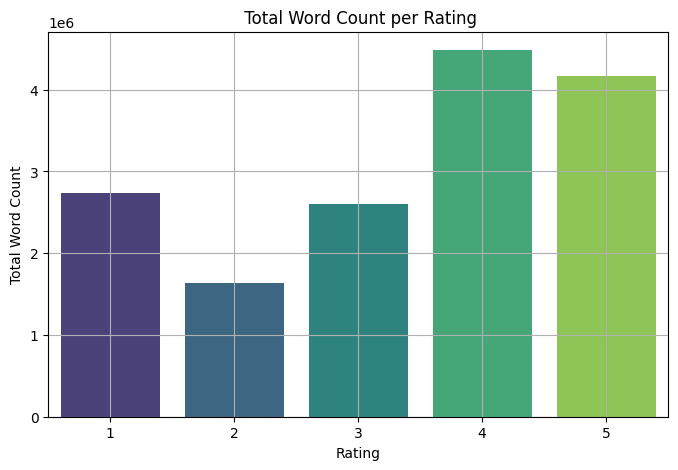

In [54]:
word_count_by_rating = df_final.groupby('Rating')['word_count'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=word_count_by_rating, x='Rating', y='word_count', palette='viridis')
plt.title(" Total Word Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Total Word Count")
plt.grid(True)
plt.show()

## Removing punctuations, URL,Emojies,special characters

In [55]:
df_final['Review'] = df_final['Review'].str.lower()
df_final['Review'] = df_final['Review'].str.replace(r'\[.*?\]', '', regex=True)

In [56]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # remove emojis
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text


In [57]:
df_final['Review']=df_final['Review'].apply(clean_text)

In [62]:
min_word_count_per_rating = df_final.groupby('Rating')['word_count'].min()

# Display the result
print(" Min word count per Rating:")
print(min_word_count_per_rating)

 Min word count per Rating:
Rating
1    5
2    9
3    9
4    3
5    2
Name: word_count, dtype: int64


In [63]:
max_word_count_per_rating = df_final.groupby('Rating')['word_count'].max()

# Display the result
print(" Max word count per Rating:")
print(max_word_count_per_rating)

 Max word count per Rating:
Rating
1    2045
2    1205
3    3389
4    1994
5    2391
Name: word_count, dtype: int64


In [61]:
df_final['word_count'] = df_final['Review'].astype(str).apply(lambda x: len(x.split()))

In [64]:
df_final = df_final[(df_final['word_count'] >= 3) & (df_final['word_count'] <= 200)]

In [74]:
df_final=df_final.drop(columns='word_count')

In [75]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149536 entries, 0 to 149535
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  149536 non-null  int64 
 1   Review  149536 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [76]:
df_final.to_csv("dataset_without.csv", encoding="utf-8-sig")

## Stop word removal and lemmatization

In [69]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [70]:
# Print all stop words
print(" Total stop words:", len(nlp.Defaults.stop_words))
print(" Stop words list:")
print(sorted(nlp.Defaults.stop_words))

 Total stop words: 326
 Stop words list:
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 

In [71]:
#lemmatization and stop word removal
def cleaning(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [77]:
df_final['Review']=df_final['Review'].apply(cleaning)

In [78]:
df_final['word_count'] = df_final['Review'].astype(str).apply(lambda x: len(x.split()))

In [79]:
min_word_count_per_rating = df_final.groupby('Rating')['word_count'].min()

# Display the result
print(" Min word count per Rating:")
print(min_word_count_per_rating)

 Min word count per Rating:
Rating
1    4
2    5
3    4
4    2
5    4
Name: word_count, dtype: int64


In [80]:
max_word_count_per_rating = df_final.groupby('Rating')['word_count'].max()

# Display the result
print(" Max word count per Rating:")
print(max_word_count_per_rating)

 Max word count per Rating:
Rating
1    142
2    130
3    142
4    164
5    131
Name: word_count, dtype: int64


In [82]:
df_final = df_final[(df_final['word_count'] >= 3)]

In [84]:
df_final=df_final.drop(columns='word_count')

In [85]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149535 entries, 0 to 149535
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  149535 non-null  int64 
 1   Review  149535 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [86]:
df_final.to_csv("final_dataset.csv", encoding="utf-8-sig")

## Viewing dataset after cleaning

In [87]:
df_final['word_count'] = df_final['Review'].astype(str).apply(lambda x: len(x.split()))

In [88]:
# Group by Rating and find the minimum word count
min_word_count_per_rating = df_final.groupby('Rating')['word_count'].min()

# Display the result
print(" Minimum word count per Rating:")
print(min_word_count_per_rating)

 Minimum word count per Rating:
Rating
1    4
2    5
3    4
4    4
5    4
Name: word_count, dtype: int64


In [89]:
# Specify the rating you're interested in
target_rating = 5


# Filter for the target rating
rating_df = df_final[df_final['Rating'] == target_rating]

# Get the minimum word count for that rating
min_word_count = rating_df['word_count'].min()

# Get the reviews with that minimum word count
min_reviews = rating_df[rating_df['word_count'] == min_word_count]

# Display
print(f" Minimum word count for Rating {target_rating}: {min_word_count}")
print(" Reviews with minimum word count:")
print(min_reviews[['Review', 'word_count']])


 Minimum word count for Rating 5: 4
 Reviews with minimum word count:
                               Review  word_count
98281   title product advertise seven           4
113502           good movie good copy           4


In [90]:
max_word_count_per_rating = df_final.groupby('Rating')['word_count'].max()

# Display the result
print(" Max word count per Rating:")
print(max_word_count_per_rating)

 Max word count per Rating:
Rating
1    142
2    130
3    142
4    164
5    131
Name: word_count, dtype: int64


In [375]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 1

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 1:

1. 15 year later mislead review write april 2010 person mention follow title mislead understand 9 pound coffee sampler case think 15 year multiple bad review amazon clarify issue purchase expensive expect not care couple silly mug box opinion know trick people not want change disappointed

2. yuck contain aspartame alternative list shame want like fiber texture great nice crunchythough make think little pet food xd fiber content super aspartame dealbreaker consume aspartame chew gum 14 can diet coke day discover actually give migraine hike anxiety level not migraine panic attack 4 year quit accidentally headache start feel nervous right away study brain tumor controversial avoid like plaguebut find today wonderful alternative fiber smart bran whopping 13 gram fiber taste pretty good nasty artificial sweetener not contain high fructose corn syrup lovely general mill change fiber healthy 1020 calorie cereal not worth headache health impact aspart

In [376]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 2

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 2:

1. extremely spicy know indian food spicy not list ingredient think d shot big piece green not think human eat dig big green thing dilute lot dairy tone rice potato eat night indigestionit probably ok like spicy food

2. old tough likely order product old past pull date 2 month

3. funky taste disappointed product horrible definitely overpriced well get 12 cent packet sugar free drink mix target add tequila

4. not beat price gloria jean cheapo brand keurig machine show ve get honesty regular 24pod box subtle taste hazelnut boy subtle flavor weak coffee not strong low 6 oz set forget 8 oz level reuse podswhen get keurig get selection green mountain coffee think firstclass kind pricey gloria jean 36 pod save fair 68 pod day difference quality not think worth worry coffee fix door couple box gloria jean case run good stuff not use regularly ll find give keurig machine

5. not smell like coffee coffee not taste bad not smell like coffee non dairy 

In [377]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 3

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 3:

1. s use xylosweet xylitol talk xylosweet diarhhea mean 2 teaspoon vs 1 corn product sooxylosweet sweet sugar need little bit guess happen not actually bake like cup cause ve scared maybe bake elimate effect ill let try firstnow food make xylitol mix stevia packet carry purse little bit xylitol add stevia take away bit stevia yucky bitter taste bit s use sothat

2. great product bad packaging iwould like share experience couscous packaging osem come couscous great cook fast make delicious north african dishesthe packaging come tear tape couscous place amazon box not damage way blame osem amazon send open tape product

3. tough miniature schnauzer love toy inroad bone end hope long

4. like flavor coffee enjoyable fall season know open special occasion opinion pleasantly surprised delightful ask refill tell amazon quizical

5. pretty good instant good misocup pretty alright honestly ve brand freezedrie instant miso soup well defense ve lot misoc

In [378]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 4

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 4:

1. apple cystaltini big fan crystal lite new appletini flavor bit sweet tart fond turn recognizable appletini green water add find add splash ginger ale give zing crave bit effervescencein case like crystal lite add dash traditional vodka quick easy drink dropin guest like zero bartende skillsi like fact come individual tube use entire packet quart pitcher opinion weak use small glass refreshing sour apple kind way buy

2. sure work delicious not test output increase eat cookie delicious stay moist ingredient brewer yeast suppose aid milk production base internet research doctor believe ingredient lead modest gain

3. richtasting fullbodie preferred method presspot aka french press taste nuance coffee bigbodied brew disappoint recommend consume asap camano island coffee roaster correct previous packaging problem

4. john lightne fast delivery nice coffee reasonably price thank order suppose

5. say dressing thick hot spicy promise find dilute l

In [379]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 5

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 5:

1. great hair buy product help condition hair work great cook try smell awesome

2. good butter ve taste amish roll butter good ve great toast bagel roll well baked potatofortunately buy grocery store county market punxsutawney pa s large amish community

3. caribou win hand sample kcup caribou blend good daily regular coffee drinker m huge fan flavor coffee love dark bitter bold type simply want smooth cup joe drink daily feel comfort consistently tasting awesome caribous perfect fit far brewing caribou kcup home keep go starbucks monthit taste well

4. good syrup good prize torani syrup latte home long spend 4 latte drink torani vanilla syrup good market

5. love cereal sure cereal time amazon sale house love little one eat right box healthy

